In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\soods\anaconda3\envs\python_project_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

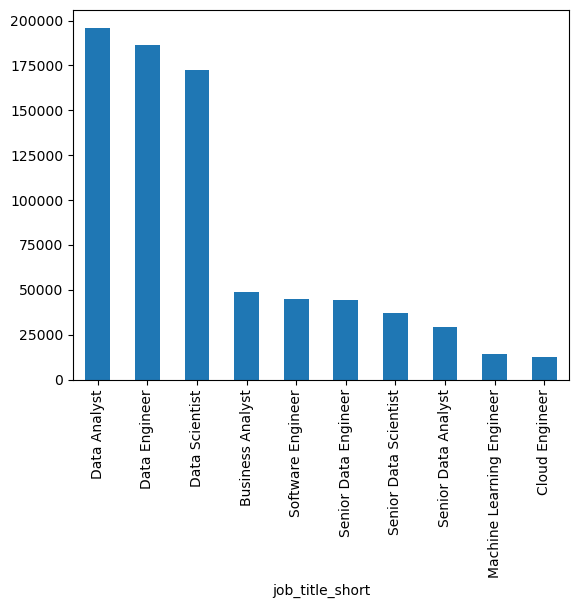

In [5]:
fig , ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind = 'bar', ax =ax)

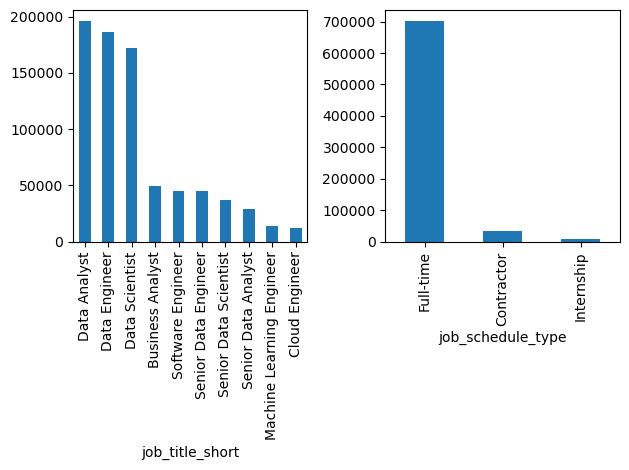

In [9]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind = 'bar' , ax= ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

fig.tight_layout()

In [16]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')

skill_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skill_count = skill_count.reset_index(name = 'skill_count')
df_skill_count.sort_values(by='skill_count', ascending=False, inplace= True)

df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [17]:
jt = ['Data Analyst', 'Data Engineer', 'Data Scientist']

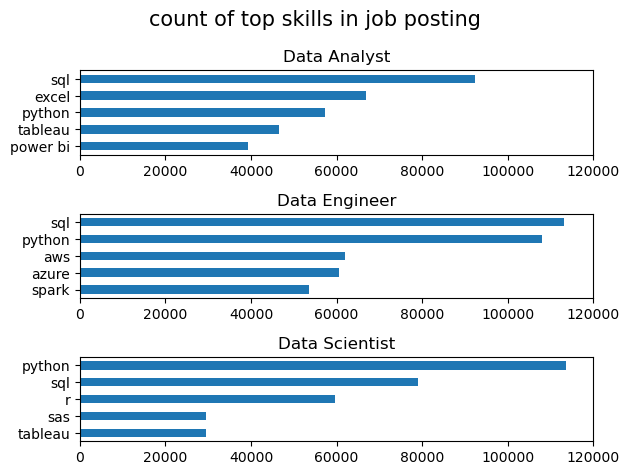

In [37]:
fig, ax =plt.subplots(3,1)

'''for a in jt:
    print(a)'''

for i,a in enumerate(jt):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == a].head(5)

    df_plot.plot(kind = 'barh', x ='job_skills', y='skill_count', ax = ax[i],title= a)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('count of top skills in job posting', fontsize = 15)

fig.tight_layout()